In [ ]:
from google.colab import drive
drive.mount('/content/drive')
# 导入必要的库
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


   Cluster_Labels  Bankrupt?  \
0               0          1   
1               0          1   
2              11          1   
3               0          1   
4               0          1   

    ROA(C) before interest and depreciation before interest  \
0                                           0.370594          
1                                           0.464291          
2                                           0.426071          
3                                           0.399844          
4                                           0.465022          

    ROA(A) before interest and % after tax  \
0                                 0.424389   
1                                 0.538214   
2                                 0.499019   
3                                 0.451265   
4                                 0.538432   

    ROA(B) before interest and depreciation after tax  \
0                                           0.405750    
1                                    

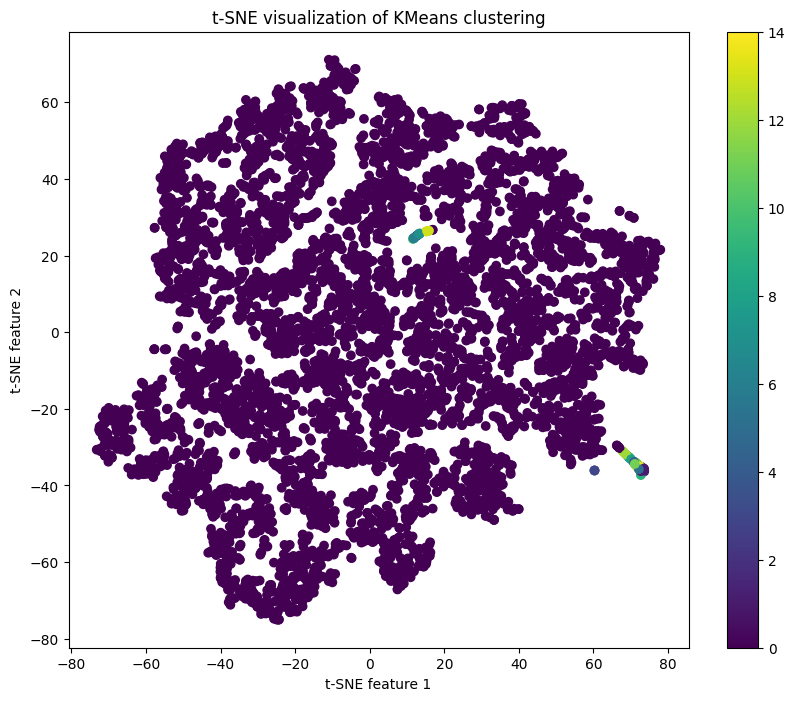

In [ ]:

# 导入必要的库
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.model_selection import cross_val_score
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# 读取数据
filename = '/content/drive/MyDrive/company-bankruptcy-prediction/data.csv'
data = pd.read_csv(filename)

# 选择所需的列
columns = [1, 3, 4, 7, 9, 10, 23, 25, 27, 35, 37, 39, 42, 46, 54, 58, 59, 61]
X = data.iloc[:, columns]

# 使用 KMeans 进行交叉验证选择最佳聚类数量
def evaluate_kmeans(X, k):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    return cross_val_score(kmeans, X, cv=5).mean()

# # 寻找最佳的聚类数量
# k_values = range(2, 11)
# scores = [evaluate_kmeans(X, k) for k in k_values]
# best_k = k_values[scores.index(max(scores))]
# print(f"Best number of clusters: {best_k}")

# 用最佳的聚类数量进行 KMeans 聚类
kmeans = KMeans(n_clusters=15, random_state=42, n_init=10)
labels = kmeans.fit_predict(X)

# 创建一个新的数据框，将聚类标签作为第一列
clustered_data = pd.DataFrame({'Cluster_Labels': labels})
clustered_data = pd.concat([clustered_data, data.reset_index(drop=True)], axis=1)

# 保存到新的 Excel 文件
output_filename = '/content/drive/MyDrive/company-bankruptcy-prediction/clustered_data_15_lables.xlsx'
clustered_data.to_excel(output_filename, index=False)

# 输出带有类别标签的数据框的前几行
print(clustered_data.head())

# 使用 t-SNE 进行可视化
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

# 绘制 t-SNE 结果
plt.figure(figsize=(10, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=labels, cmap='viridis', marker='o')
plt.colorbar()
plt.title('t-SNE visualization of KMeans clustering')
plt.xlabel('t-SNE feature 1')
plt.ylabel('t-SNE feature 2')
plt.show()

Accuracy: 0.9620178911863909
F1 Score: 0.08480565371024734


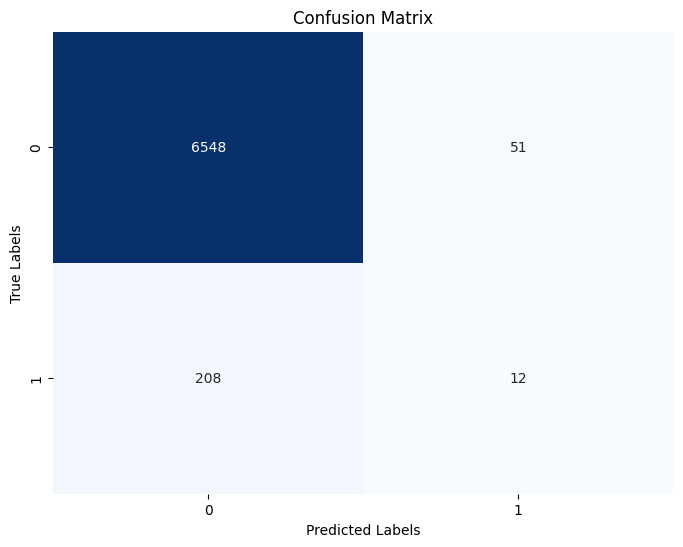

In [ ]:

# 导入必要的库
import pandas as pd
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 读取 Excel 文件
input_filename = '/content/drive/MyDrive/company-bankruptcy-prediction/clustered_data_15_lables.xlsx'
df = pd.read_excel(input_filename)

# 假设第一列是聚类标签，第二列是真实标签
cluster_labels = df.iloc[:, 0]
true_labels = df.iloc[:, 1]

# 将聚类标签转换为二分类标签
binary_cluster_labels = cluster_labels.apply(lambda x: 0 if x == 0 else 1)

# 计算准确率和 F1 分数
accuracy = accuracy_score(true_labels, binary_cluster_labels)
f1 = f1_score(true_labels, binary_cluster_labels)

print(f'Accuracy: {accuracy}')
print(f'F1 Score: {f1}')

# 计算混淆矩阵
cm = confusion_matrix(true_labels, binary_cluster_labels)

# 绘制混淆矩阵
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()
